In [2]:
# Set up
import numpy as np
import scipy.io
import scipy.ndimage.filters
import os
import matplotlib
import matplotlib.pyplot as plt
import pickle
import random
import sys

In [3]:
# Load data
dataDir = r'/Users/yiting/Documents/NMA_DL/Project/Movement_BCI/joystick_track/data'
files = os.listdir(dataDir)
# load the data for the first patience 
data= scipy.io.loadmat(os.path.join(dataDir, files[0]))
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'CursorPosX', 'CursorPosY', 'TargetPosX', 'TargetPosY', 'subject', 'electrodes', 'data'])

In [4]:
# Plot cursor trajectory
location=data['electrodes']
cursorX = data['CursorPosX']
cursorY = data['CursorPosY']

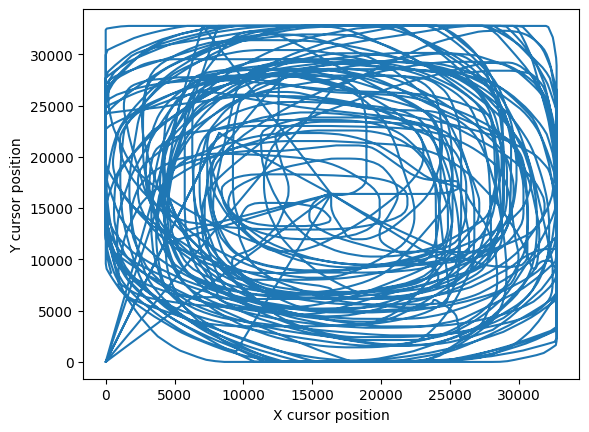

In [5]:
fig = plt.figure()
plt.plot(cursorX, cursorY)
plt.xlabel("X cursor position")
plt.ylabel("Y cursor position")
plt.show()
fig.savefig('/Users/yiting/Documents/NMA_DL/Project/Movement_BCI/cursor_trajectory.png', dpi = 150)

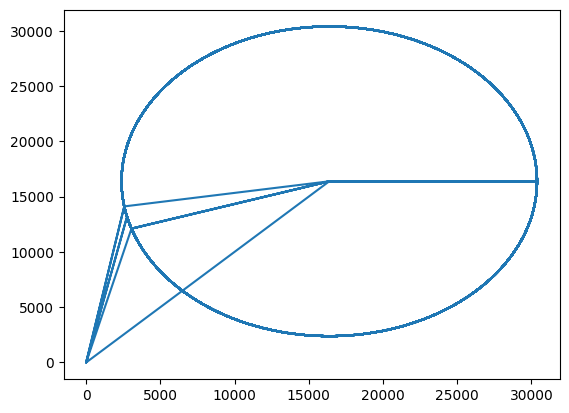

In [6]:
# Check target position
targetX = data['TargetPosX']
targetY = data['TargetPosY']
plt.plot(targetX, targetY)

In [9]:
ecog = data['data']
nt, nch = ecog.shape
print(nt) # number of time bins (1ms bin)
print(nch) # number of channels

372760
60


Text(0.5, 1.0, 'Cursor Y')

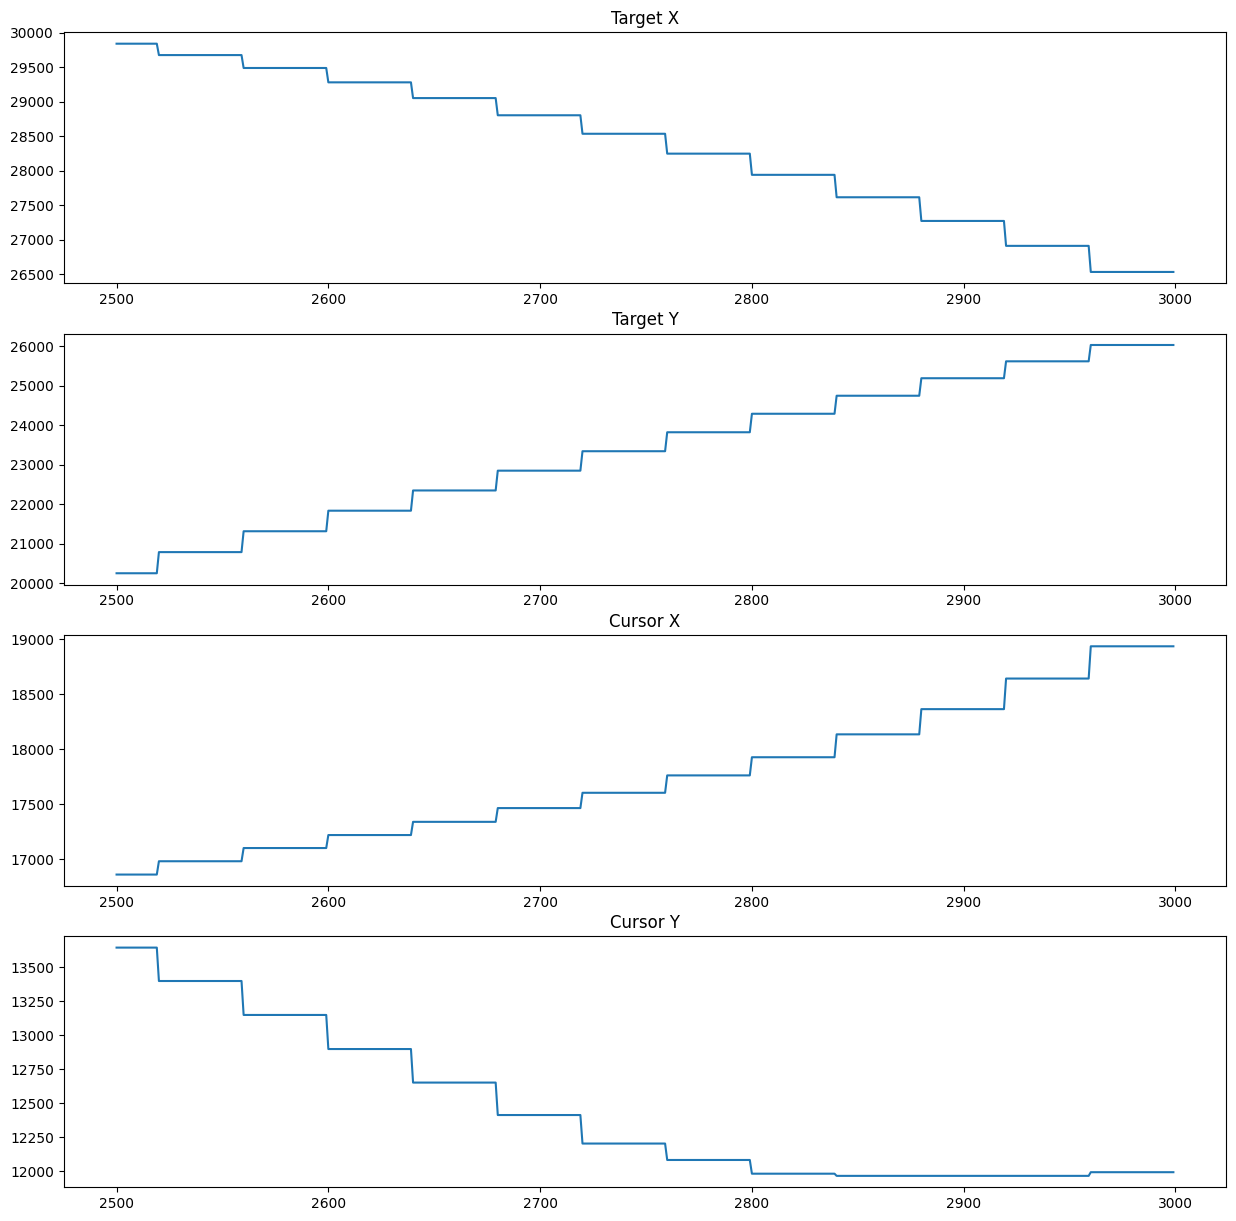

In [10]:
# Plot target and cursor position over time
time_range = np.arange(2500,3000)
channel_range = np.arange(8,15)
plt.figure(figsize=(15, 15))
ax = plt.subplot(4,1,1)
plt.plot(time_range, targetX[time_range])
plt.title('Target X')
ax = plt.subplot(4,1,2)
plt.plot(time_range, targetY[time_range])
plt.title('Target Y')
ax = plt.subplot(4,1,3)
plt.plot(time_range, cursorX[time_range])
plt.title('Cursor X')
ax = plt.subplot(4,1,4)
plt.plot(time_range, cursorY[time_range])
plt.title('Cursor Y')

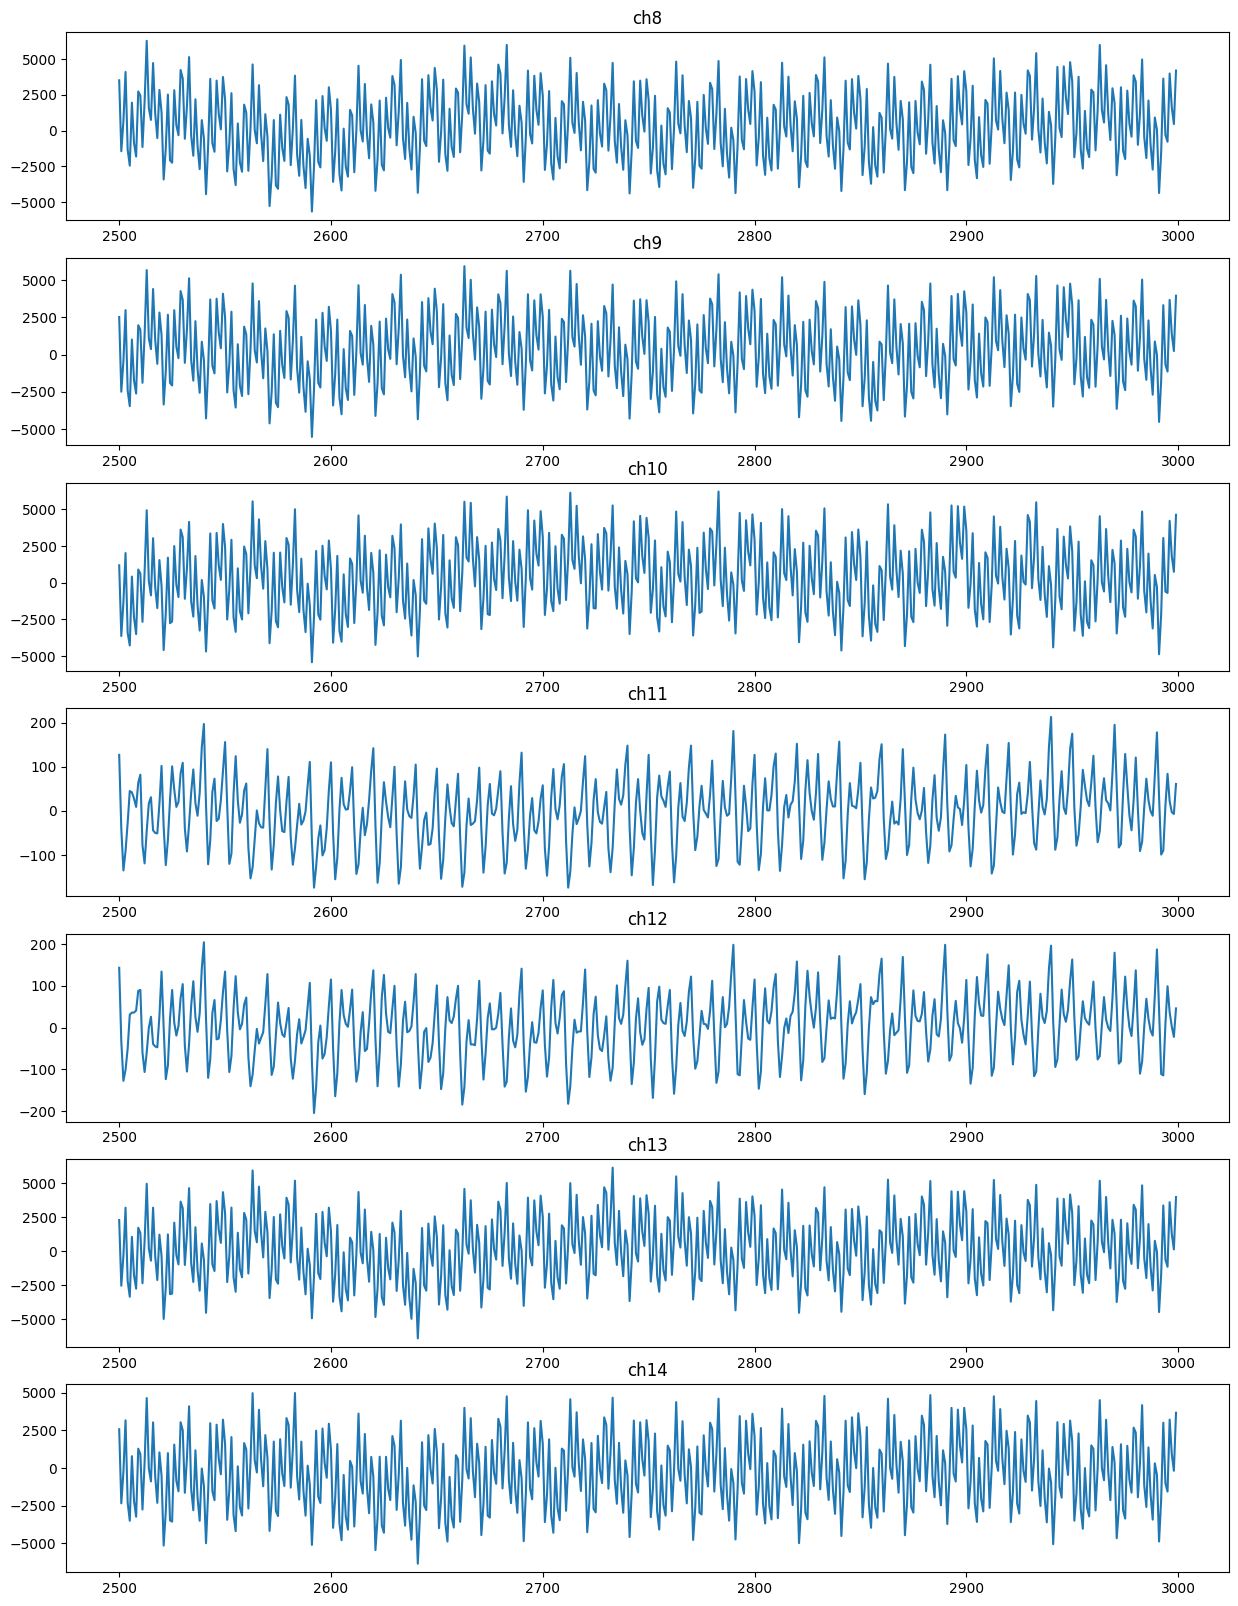

In [11]:
# Plot ECoG signals over time
plt.figure(figsize=(15, 20))
for idx, j in enumerate(channel_range):
  ax = plt.subplot(len(channel_range),1,idx+1)
  plt.plot(time_range, ecog[time_range, j])
  plt.title('ch%d'%j)
plt.show()

In [12]:
# Filter ECoG signals
lowcut = 0.15
highcut = 500
order = 4
nyquistFreq = 1000 
# The Nyquist frequency is the highest frequency that equipment of a given sample rate can reliably measure, 
# one-half the given sample rate.

low  = lowcut / nyquistFreq
high = highcut / nyquistFreq

b, a = scipy.signal.butter(order, [low, high], btype='bandpass')
ch_num = ecog.shape[1]
filtered_ecog = np.zeros_like(ecog)
for i in range(ch_num):
    filtered_ecog[:,i] = scipy.signal.filtfilt(b, a, ecog[:, i]) 

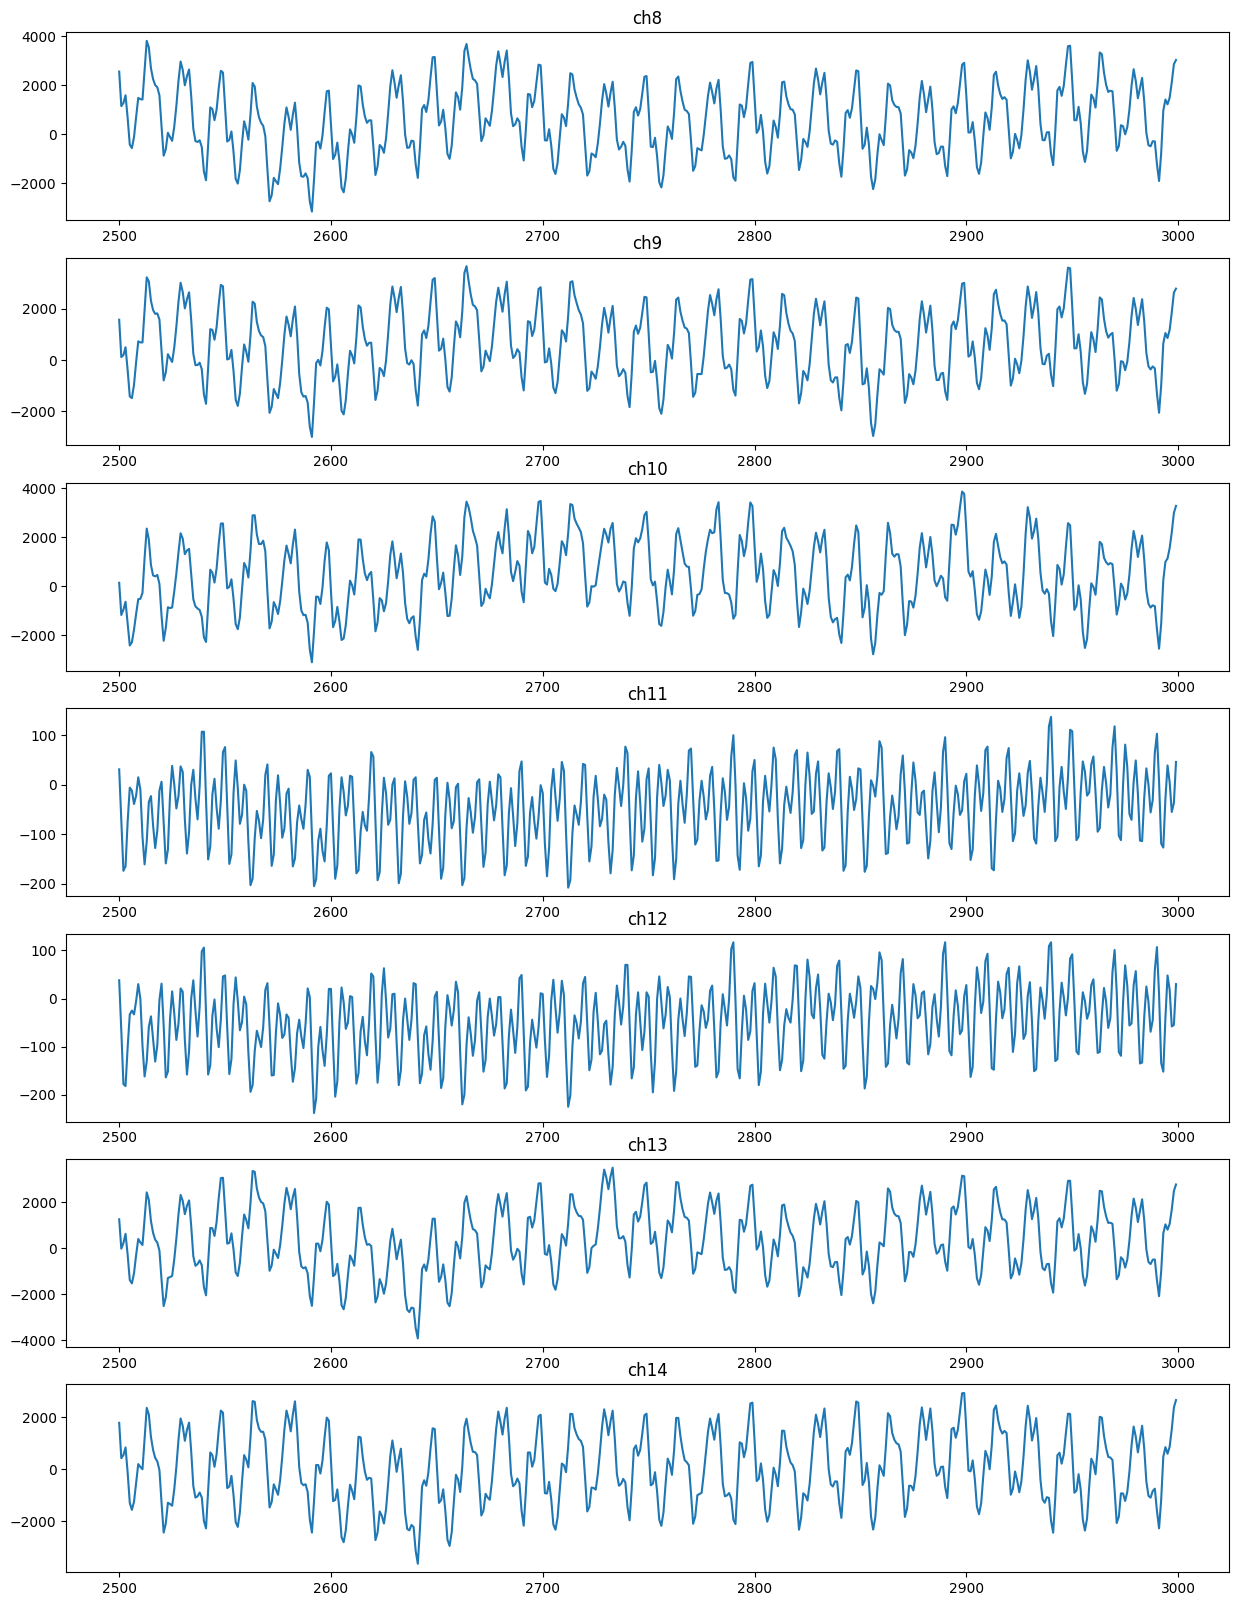

In [13]:
plt.figure(figsize=(15, 20))
for idx, j in enumerate(channel_range):
  ax = plt.subplot(len(channel_range),1,idx+1)
  plt.plot(time_range, filtered_ecog[time_range, j])
  plt.title('ch%d'%j)
plt.show()